# **Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech**

Nama: Umar Hamzah Ramadhan

Email: uhamzahr04@gmail.com

Id Dicoding: hamzhrdn

**Python Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **Data Understanding**

Import dataset

In [2]:
df = pd.read_csv('data\data.csv', sep=';', encoding='utf-8')
df.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


Cek Attribute Null

In [3]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [6]:
numericals = [
    "Application_order",
    "Previous_qualification_grade",
    "Admission_grade",
    "Age_at_enrollment",
    "Curricular_units_1st_sem_credited",
    "Curricular_units_1st_sem_enrolled",
    "Curricular_units_1st_sem_evaluations",
    "Curricular_units_1st_sem_approved",
    "Curricular_units_1st_sem_grade",
    "Curricular_units_1st_sem_without_evaluations",
    "Curricular_units_2nd_sem_credited",
    "Curricular_units_2nd_sem_enrolled",
    "Curricular_units_2nd_sem_evaluations",
    "Curricular_units_2nd_sem_approved",
    "Curricular_units_2nd_sem_grade",
    "Curricular_units_2nd_sem_without_evaluations",
    "Unemployment_rate",
    "Inflation_rate",
    "GDP"
]

categoricals = [
    "Marital_status",
    "Application_mode",
    "Course",
    "Daytime_evening_attendance",
    "Previous_qualification",
    "Nacionality",
    "Mothers_qualification",
    "Fathers_qualification",
    "Mothers_occupation",
    "Fathers_occupation",
    "Displaced",
    "Educational_special_needs",
    "Debtor",
    "Tuition_fees_up_to_date",
    "Gender",
    "Scholarship_holder",
    "International",
]

target = "Status"

**EDA**

Text(0, 0.5, 'Frequency')

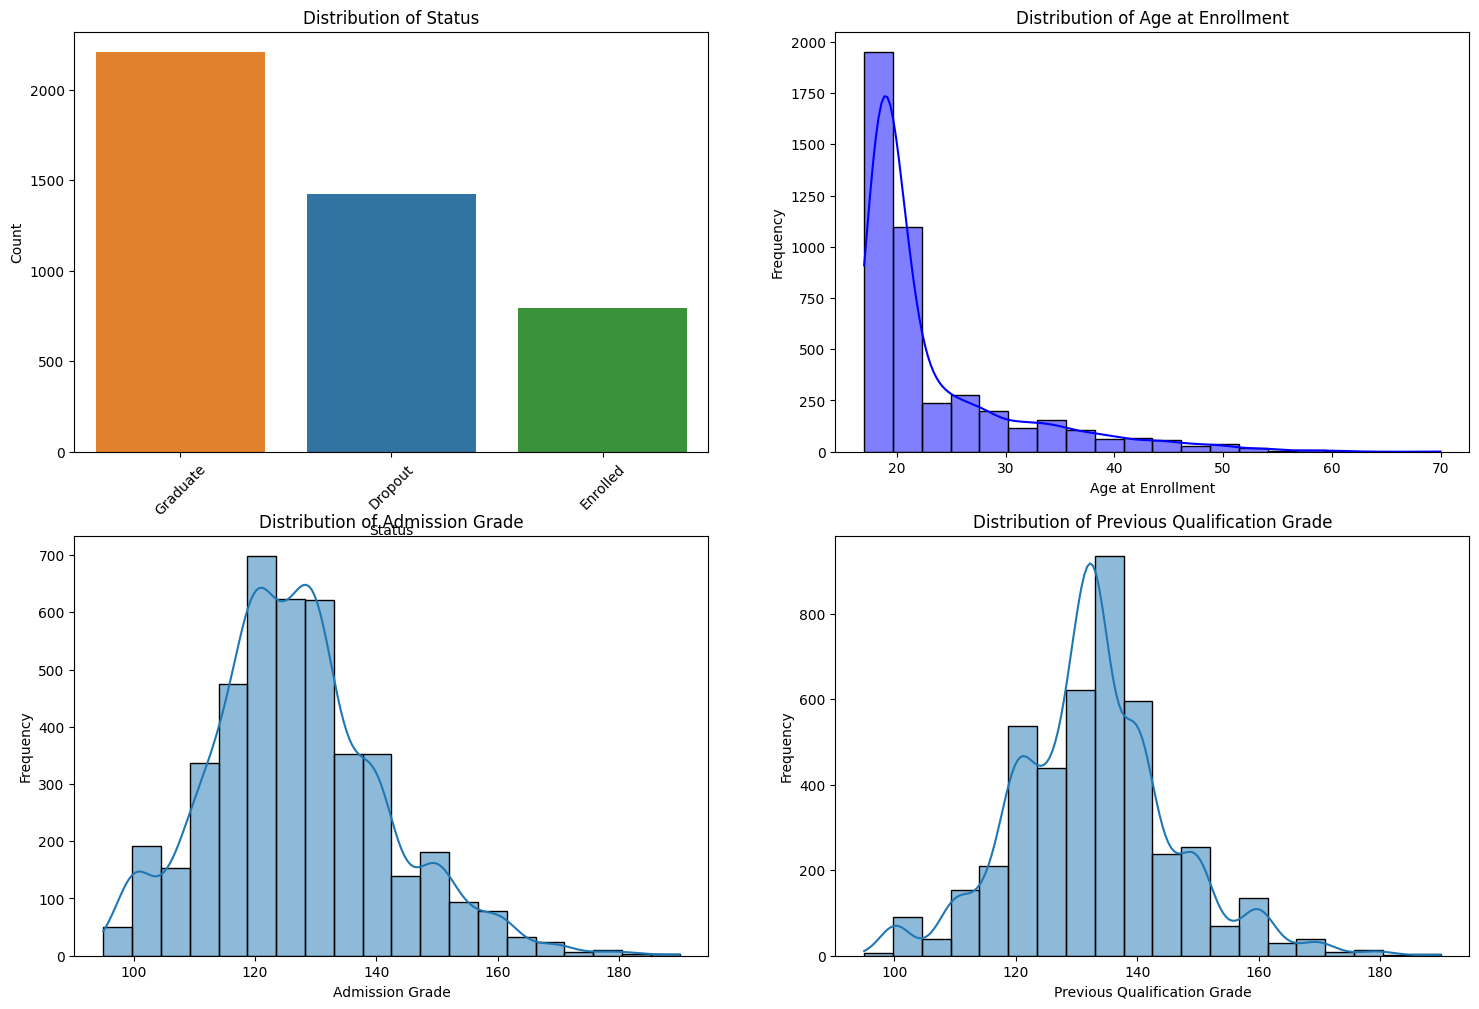

In [7]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.countplot(data=df, x=target, order=df[target].value_counts().index, hue=target)
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.histplot(df['Age_at_enrollment'], kde=True, bins=20, color='blue')
plt.title('Distribution of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(df['Admission_grade'], kde=True, bins=20)
plt.title('Distribution of Admission Grade')
plt.xlabel('Admission Grade')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(df['Previous_qualification_grade'], kde=True, bins=20)
plt.title('Distribution of Previous Qualification Grade')
plt.xlabel('Previous Qualification Grade')
plt.ylabel('Frequency')

Text(0, 0.5, 'Count')

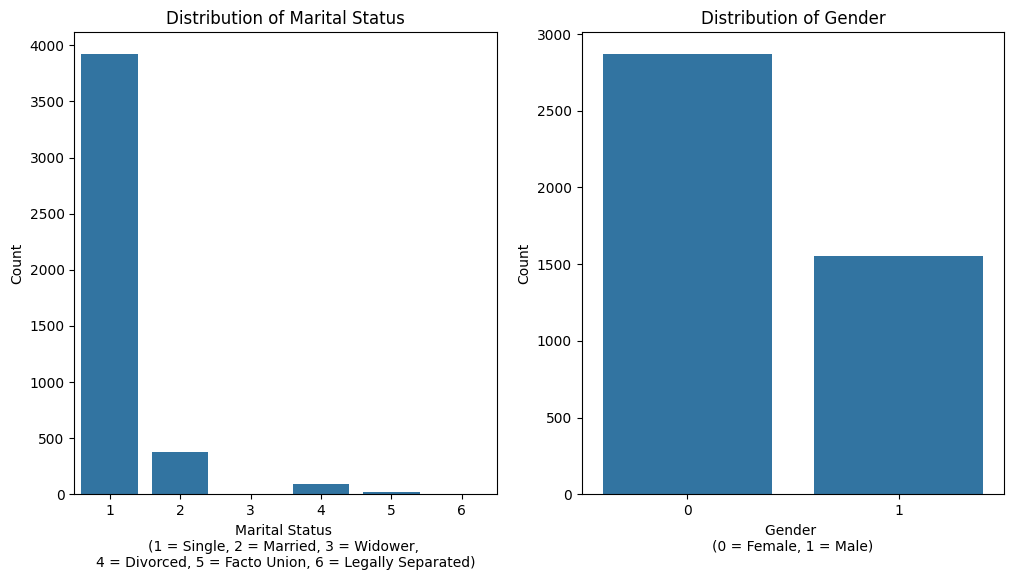

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Marital_status', data=df)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status \n(1 = Single, 2 = Married, 3 = Widower, \n4 = Divorced, 5 = Facto Union, 6 = Legally Separated)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender \n(0 = Female, 1 = Male)')
plt.ylabel('Count')

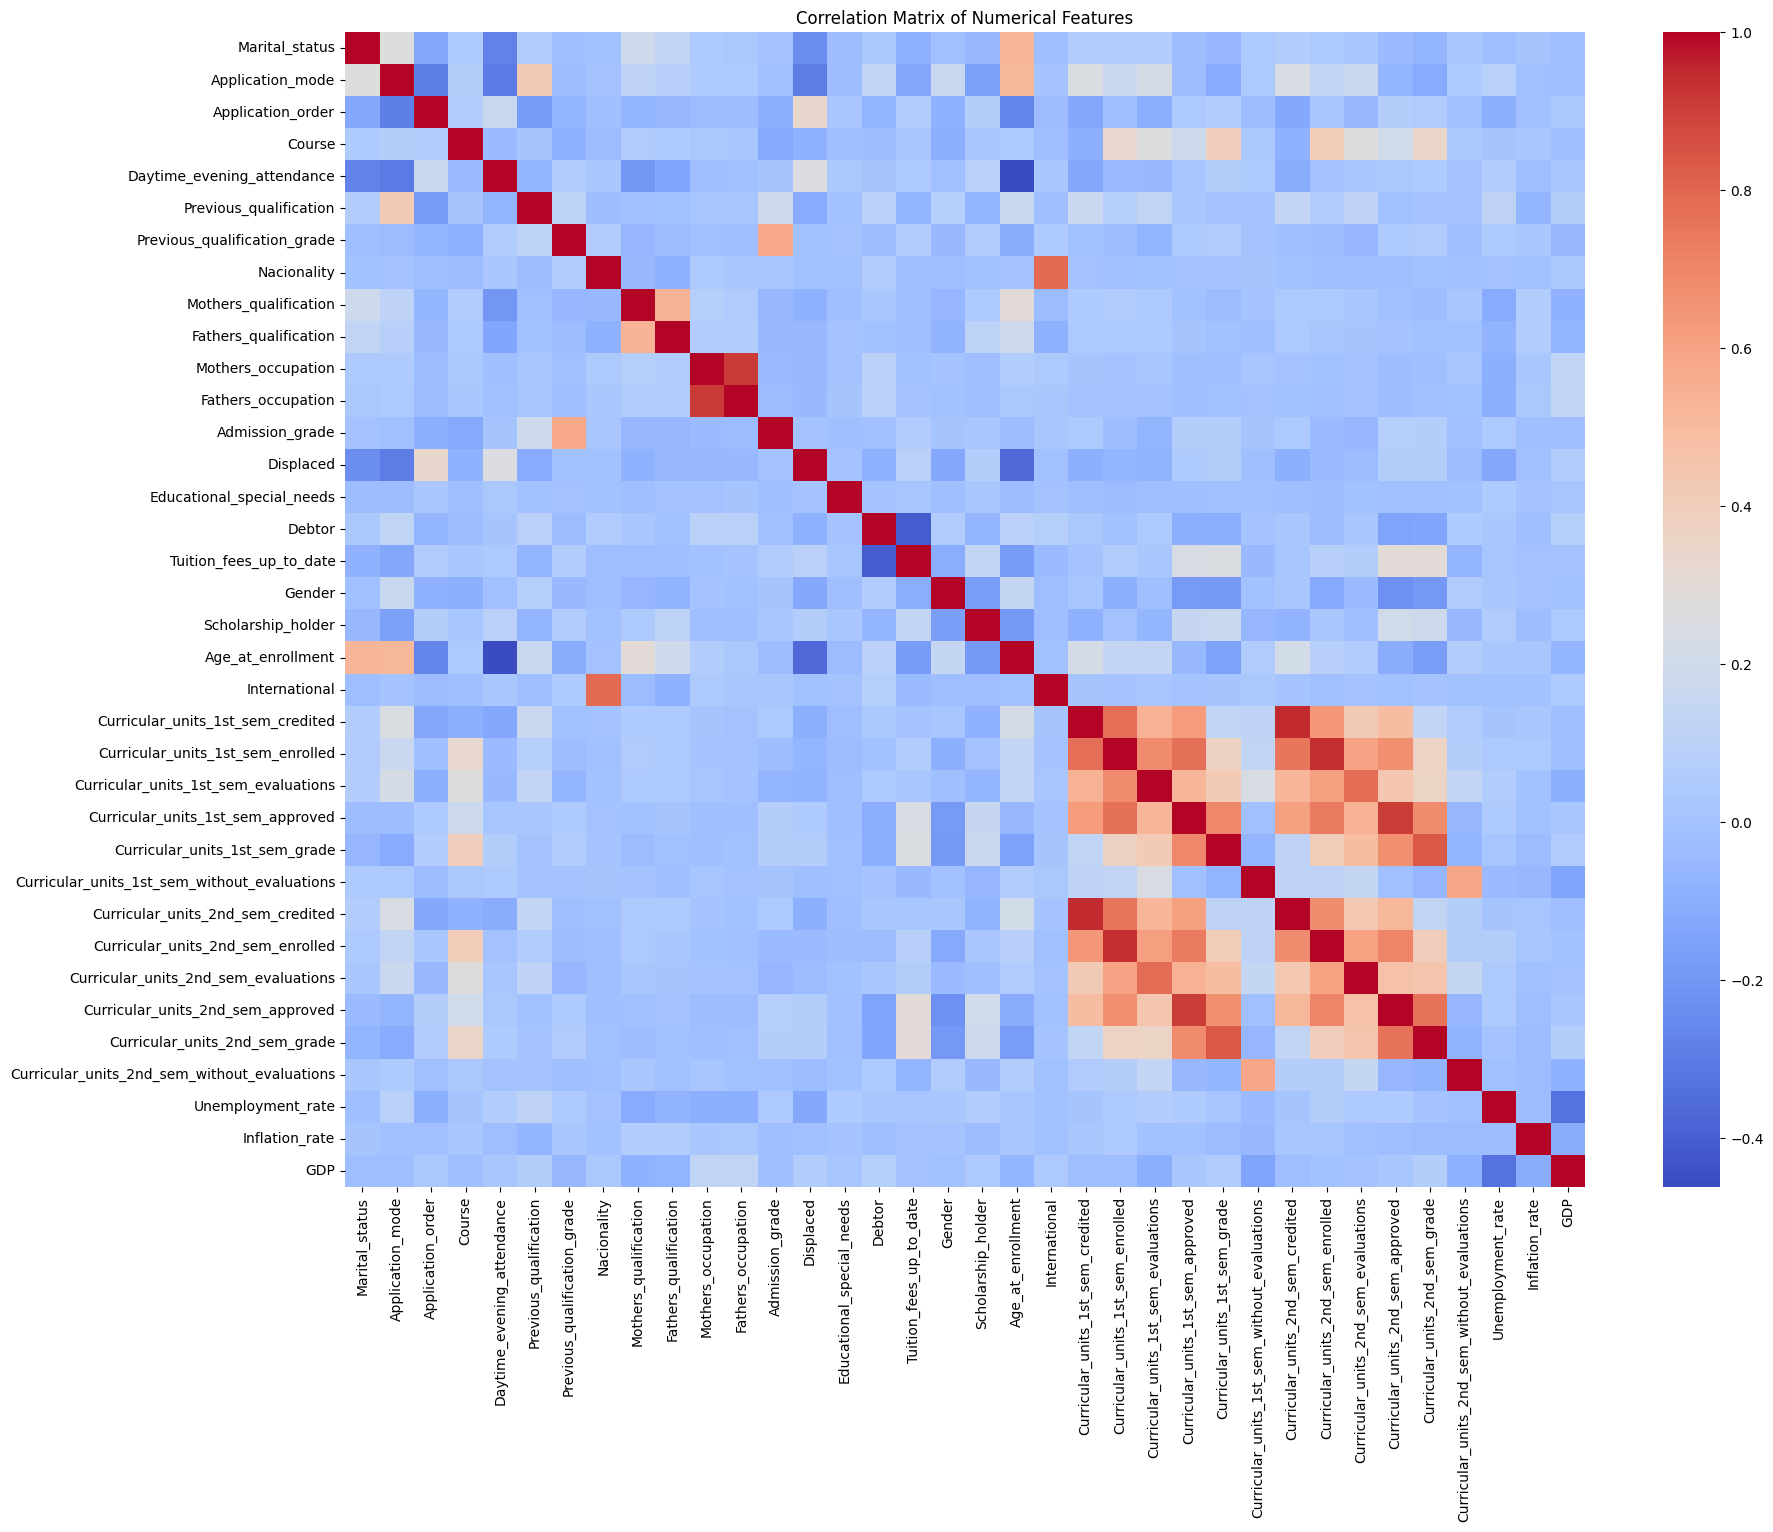

In [9]:
plt.figure(figsize=(20, 15))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Data Preparation**

In [10]:
df["target"] = df[target].apply(lambda x: 1 if x == "Dropout" else 0)
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0


In [11]:
X = df.drop(columns=["Status", "target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)   

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Modelling**

In [13]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

log_model = LogisticRegression(max_iter = 500, random_state=42)
CV_lr = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, scoring='accuracy')
CV_lr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2']},
             scoring='accuracy')

In [14]:
folder_name = 'model'
os.makedirs(folder_name, exist_ok=True)

model_name = os.path.join(folder_name, 'student_dropout_model.joblib')
scaler_name = os.path.join(folder_name, 'scaler.joblib')

joblib.dump(CV_lr.best_estimator_, model_name)
joblib.dump(scaler, scaler_name)

print(f"Model saved to '{model_name}'")
print(f"Scaler saved to '{scaler_name}'")

Model saved to 'model\student_dropout_model.joblib'
Scaler saved to 'model\scaler.joblib'


**Evaluation**

In [15]:
y_pred_scaled = CV_lr.predict(X_test_scaled)
y_pred_proba_scaled = CV_lr.predict_proba(X_test_scaled)[:, 1]

In [16]:
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy: {accuracy_scaled:.2f}")

Accuracy: 0.86



Confusion Matrix (with Normalization):
[[690  42]
 [109 265]]


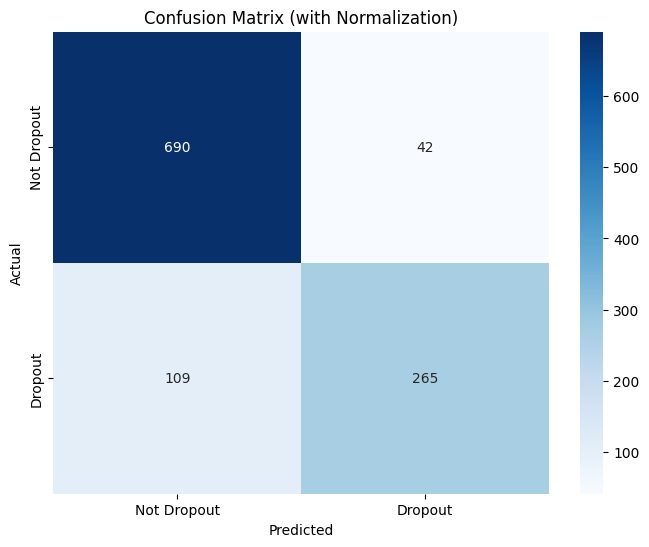

In [17]:
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_scaled, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Dropout', 'Dropout'],
            yticklabels=['Not Dropout', 'Dropout'])
plt.title('Confusion Matrix (with Normalization)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix_normalized.png')
print("\nConfusion Matrix (with Normalization):")
print(conf_matrix_scaled)

In [18]:
class_report_scaled = classification_report(y_test, y_pred_scaled, target_names=['Not Dropout', 'Dropout'])
print("\nClassification Report:")
print(class_report_scaled)


Classification Report:
              precision    recall  f1-score   support

 Not Dropout       0.86      0.94      0.90       732
     Dropout       0.86      0.71      0.78       374

    accuracy                           0.86      1106
   macro avg       0.86      0.83      0.84      1106
weighted avg       0.86      0.86      0.86      1106

